## 観測ロケットMOMO2号機のCバンドテレメトリ可視化

2018年6月30日（土）に打上げたMOMO2号機のCバンドテレメトリを可視化するスクリプト。
空欄になっているCSVからグラフ化

### 環境
Python 3.5 Anaconda

グラフが日本語表示されない場合は... http://qiita.com/knknkn1162/items/be87cba14e38e2c0f656

### 外部モジュール
https://github.com/scivision/pymap3d

In [2]:
import numpy as np
from numpy import pi, deg2rad, rad2deg, sin, cos
from scipy import interpolate
import pandas as pd
import matplotlib.pyplot as plt
import pymap3d as pm

%matplotlib inline
plt.rcParams["figure.figsize"] = (12,5)
plt.rcParams["savefig.dpi"] = 300
%config InlineBackend.figure_format = 'retina'


In [8]:
# ファイル読み込み
col = [x for x in range(1,155)]
df1 = pd.read_csv("../telemetry_csv/C_band/blank_CSV_understandable_people_only/C_pc1_totallog_chgpoint.csv", names = col)

savename = "../telemetry_plot/C_band_telemetry/MOMO2_C_band_"
PC_num = "PC1_"

source_txt = "(Source: C band Telemetry)"

## 圧力履歴

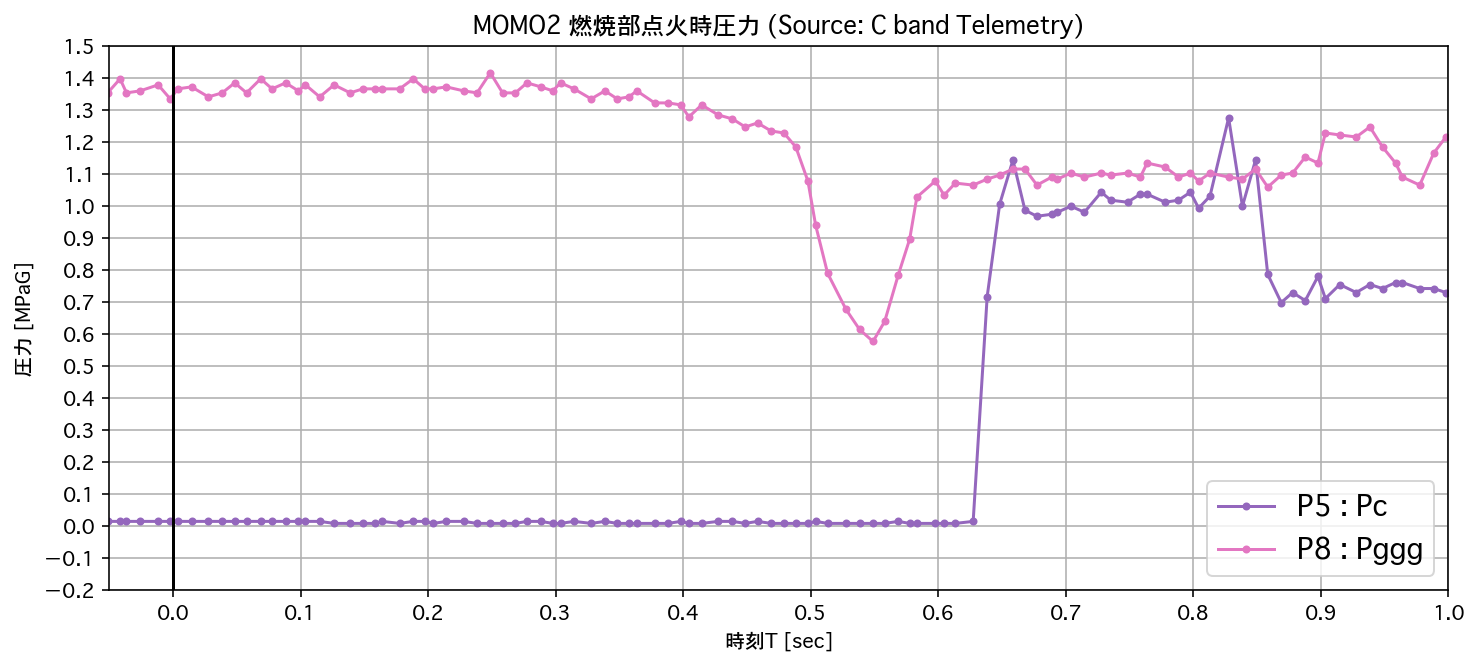

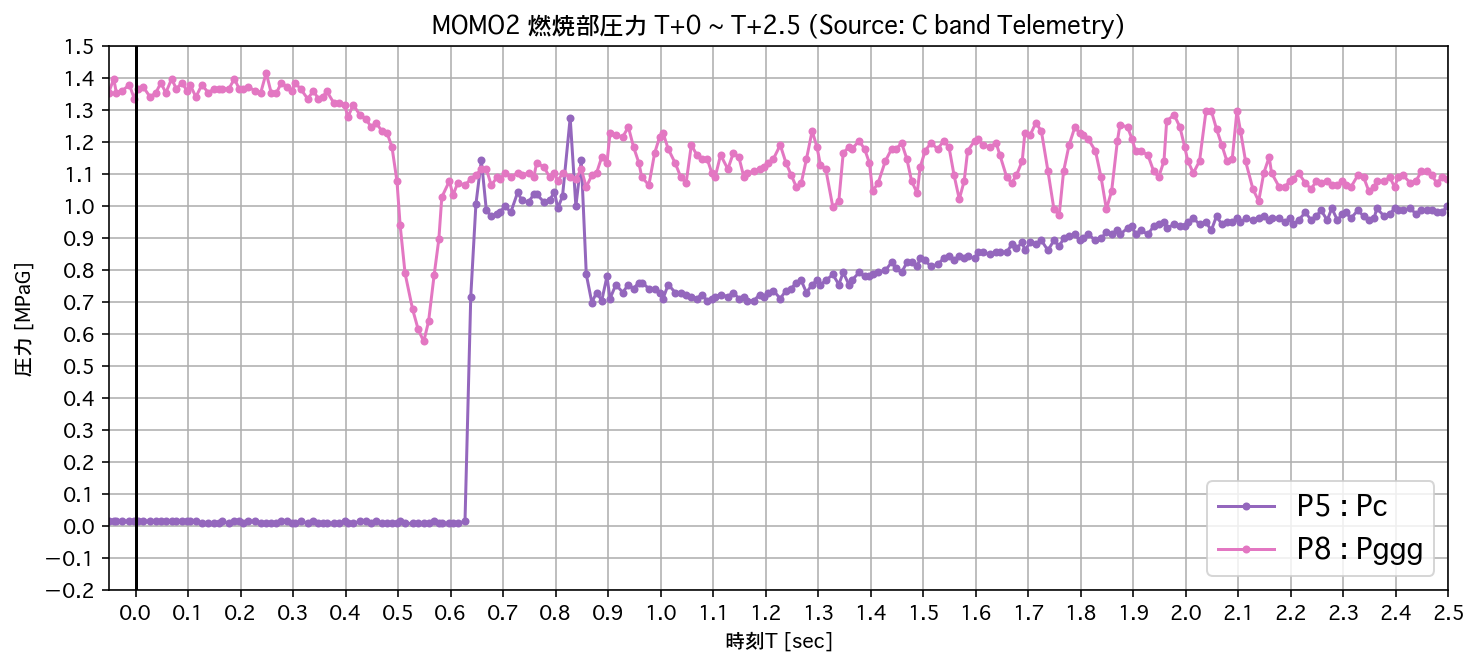

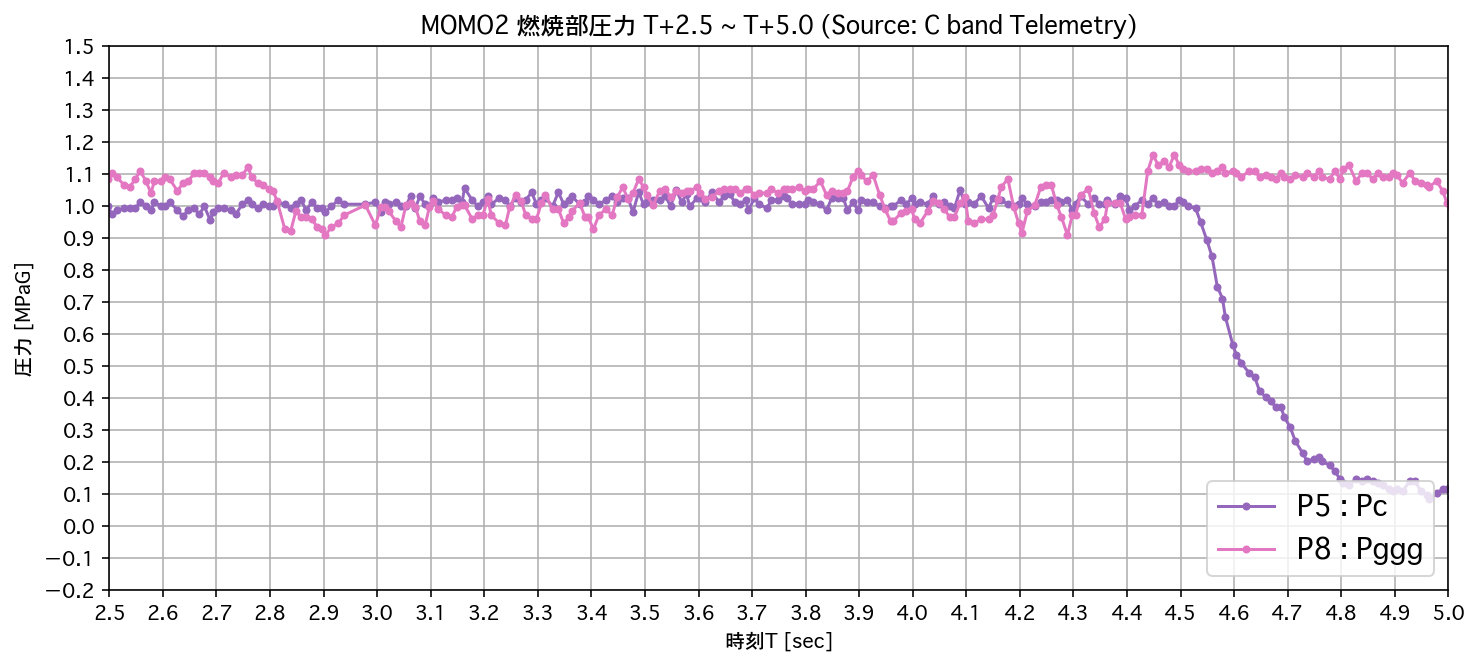

In [5]:
alpha = 1.0
plt.figure()
plt.plot(df1[1].loc[df1[38].isnull() == False], df1[38].loc[df1[38].isnull() == False], ".-", color="C4", alpha=alpha, label="P5 : Pc")
plt.plot(df1[1].loc[df1[40].isnull() == False], df1[40].loc[df1[40].isnull() == False], ".-", color="C6", alpha=alpha, label="P8 : Pggg")
plt.grid()
plt.legend(fontsize=14, loc = "lower right")
plt.title("MOMO2 燃焼部点火時圧力 " + source_txt)
plt.xlabel("時刻T [sec]")
plt.ylabel("圧力 [MPaG]")
plt.xticks(np.arange(0,1.1,0.1))
plt.xlim([-0.05, 1])
# plt.ylim(ymin=0)
plt.ylim([-0.15, 1.5])
plt.yticks(np.arange(-0.2,1.6,0.1))
plt.axvline(x=0, color="k")
plt.savefig(savename + PC_num + "pressure_ignition" + ".png")

plt.figure()
plt.plot(df1[1].loc[df1[38].isnull() == False], df1[38].loc[df1[38].isnull() == False], ".-", color="C4", alpha=alpha, label="P5 : Pc")
plt.plot(df1[1].loc[df1[40].isnull() == False], df1[40].loc[df1[40].isnull() == False], ".-", color="C6", alpha=alpha, label="P8 : Pggg")
plt.grid()
plt.legend(fontsize=14, loc = "lower right")
plt.title("MOMO2 燃焼部圧力 T+0 ~ T+2.5 " + source_txt)
plt.xlabel("時刻T [sec]")
plt.ylabel("圧力 [MPaG]")
plt.xticks(np.arange(0,2.6,0.1))
plt.xlim([-0.05, 2.5])
# plt.ylim(ymin=0)
plt.ylim([-0.15, 1.5])
plt.yticks(np.arange(-0.2,1.6,0.1))
plt.axvline(x=0, color="k")
plt.savefig(savename + PC_num + "pressure_ignition-2.5s" + ".png")

plt.figure()
plt.plot(df1[1].loc[df1[38].isnull() == False], df1[38].loc[df1[38].isnull() == False], ".-", color="C4", alpha=alpha, label="P5 : Pc")
plt.plot(df1[1].loc[df1[40].isnull() == False], df1[40].loc[df1[40].isnull() == False], ".-", color="C6", alpha=alpha, label="P8 : Pggg")
plt.grid()
plt.legend(fontsize=14, loc = "lower right")
plt.title("MOMO2 燃焼部圧力 T+2.5 ~ T+5.0 " + source_txt)
plt.xlabel("時刻T [sec]")
plt.ylabel("圧力 [MPaG]")
plt.xticks(np.arange(2.5,5.1,0.1))
plt.xlim([2.5, 5])
# plt.ylim(ymin=0)
plt.ylim([-0.15, 1.5])
plt.yticks(np.arange(-0.2,1.6,0.1))
plt.axvline(x=0, color="k")
plt.savefig(savename + PC_num + "pressure_ignition-5.0s" + ".png")


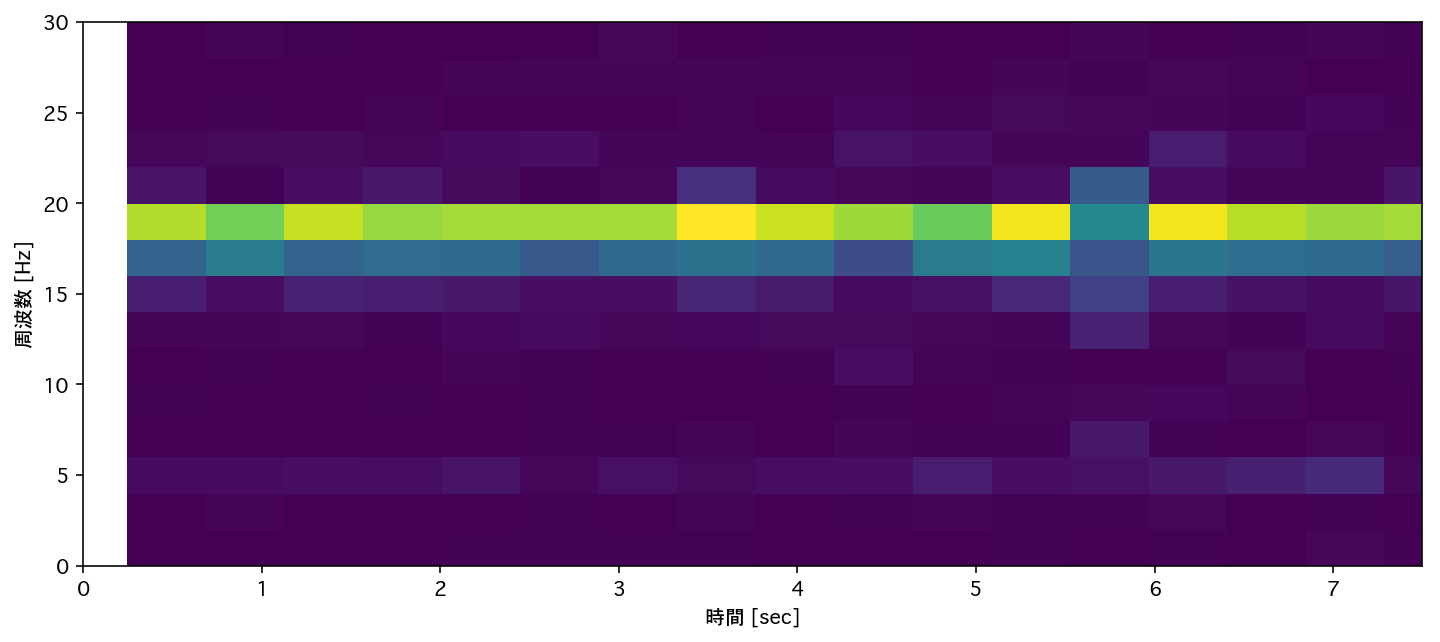

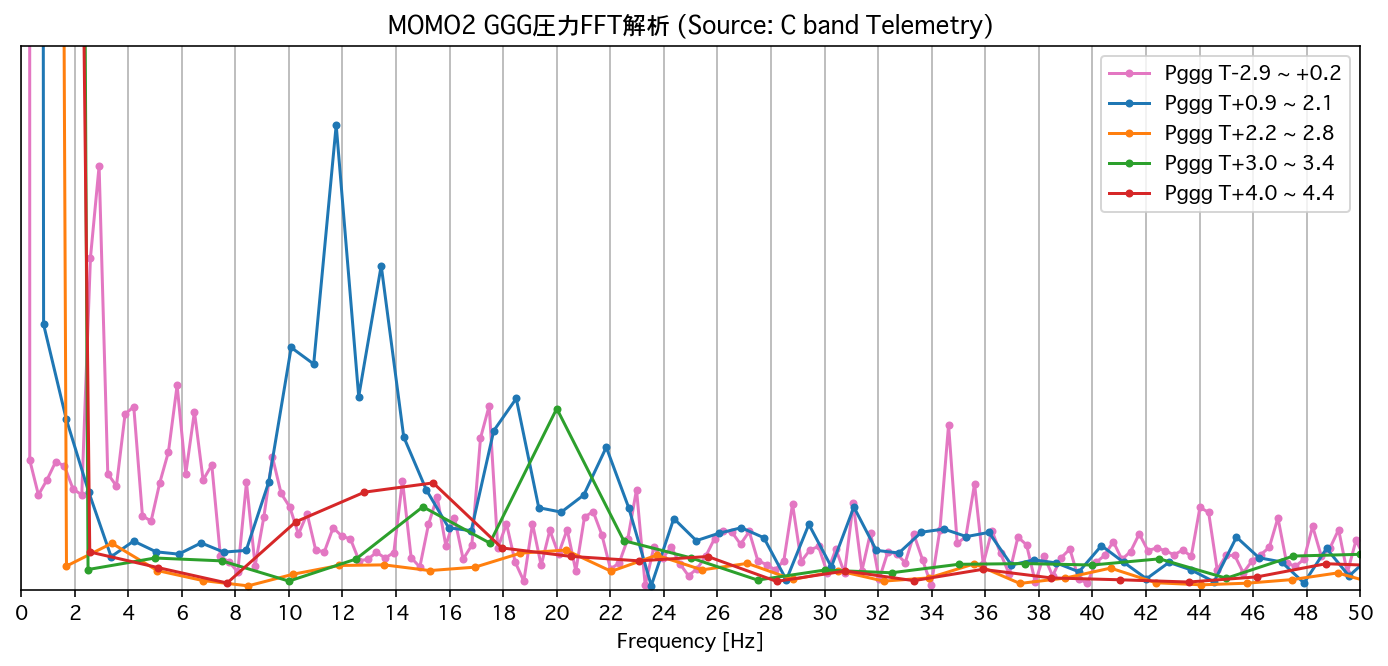

In [9]:
# 周波数解析
from scipy import signal
fs = 100.0 # サンプリング周波数
f,t,Sxx = signal.spectrogram(df1[40].loc[df1[40].isnull() == False], fs, nperseg=50)

plt.figure()
plt.pcolormesh(t,f,Sxx,vmax=2e-5)
plt.xlim([0,7.5])
plt.ylim([0,30])
plt.xlabel(u"時間 [sec]")
plt.ylabel(u"周波数 [Hz]")
# plt.colorbar()


plt.figure()

t_start = -2.9
t_end = 0.2
N = df1[40].loc[df1[40].isnull() == False].loc[df1[1]>t_start ].loc[df1[1]<t_end].size            # サンプル数
dt = 0.01          # サンプリング間隔
freq = np.linspace(0, 1.0/dt, N) # 周波数軸
F = np.fft.fft(df1[40].loc[df1[40].isnull() == False].loc[df1[1]>t_start ].loc[df1[1]<t_end])
Amp = np.abs(F)
plt.plot(freq, Amp, "C6.-", label='Pggg T%.1f ~ +%.1f' %(t_start, t_end))

t_start = 0.9
t_end = 2.1
N = df1[40].loc[df1[40].isnull() == False].loc[df1[1]>t_start ].loc[df1[1]<t_end].size            # サンプル数
dt = 0.01          # サンプリング間隔
freq = np.linspace(0, 1.0/dt, N) # 周波数軸
F = np.fft.fft(df1[40].loc[df1[40].isnull() == False].loc[df1[1]>t_start ].loc[df1[1]<t_end])
Amp = np.abs(F)
plt.plot(freq, Amp, "C0.-", label='Pggg T+%.1f ~ %.1f' %(t_start, t_end))


t_start = 2.2
t_end = 2.8
N = df1[40].loc[df1[40].isnull() == False].loc[df1[1]>t_start ].loc[df1[1]<t_end].size            # サンプル数
freq = np.linspace(0, 1.0/dt, N) # 周波数軸
F = np.fft.fft(df1[40].loc[df1[40].isnull() == False].loc[df1[1]>t_start ].loc[df1[1]<t_end])
Amp = np.abs(F)
plt.plot(freq, Amp, "C1.-", label='Pggg T+%.1f ~ %.1f' %(t_start, t_end))

t_start = 3.0
t_end = 3.4
N = df1[40].loc[df1[40].isnull() == False].loc[df1[1]>t_start ].loc[df1[1]<t_end].size            # サンプル数
freq = np.linspace(0, 1.0/dt, N) # 周波数軸
F = np.fft.fft(df1[40].loc[df1[40].isnull() == False].loc[df1[1]>t_start ].loc[df1[1]<t_end])
Amp = np.abs(F)
plt.plot(freq, Amp*2, "C2.-", label='Pggg T+%.1f ~ %.1f' %(t_start, t_end))

t_start = 4.0
t_end = 4.4
N = df1[40].loc[df1[40].isnull() == False].loc[df1[1]>t_start ].loc[df1[1]<t_end].size            # サンプル数
freq = np.linspace(0, 1.0/dt, N) # 周波数軸
F = np.fft.fft(df1[40].loc[df1[40].isnull() == False].loc[df1[1]>t_start ].loc[df1[1]<t_end])
Amp = np.abs(F)
plt.plot(freq, Amp, "C3.-", label='Pggg T+%.1f ~ %.1f' %(t_start, t_end))


plt.xlabel('Frequency [Hz]')
# plt.ylabel('Amplitude', fontsize=20)
plt.gca().xaxis.grid(True)
plt.yticks([], [])
plt.xticks(np.arange(0,52,2))
plt.xlim([0,50])
plt.ylim([0,3.5])
plt.legend()
plt.title("MOMO2 GGG圧力FFT解析 " + source_txt)
plt.savefig(savename + PC_num + "pressureFFT_GGG" + ".png")


## 加速度

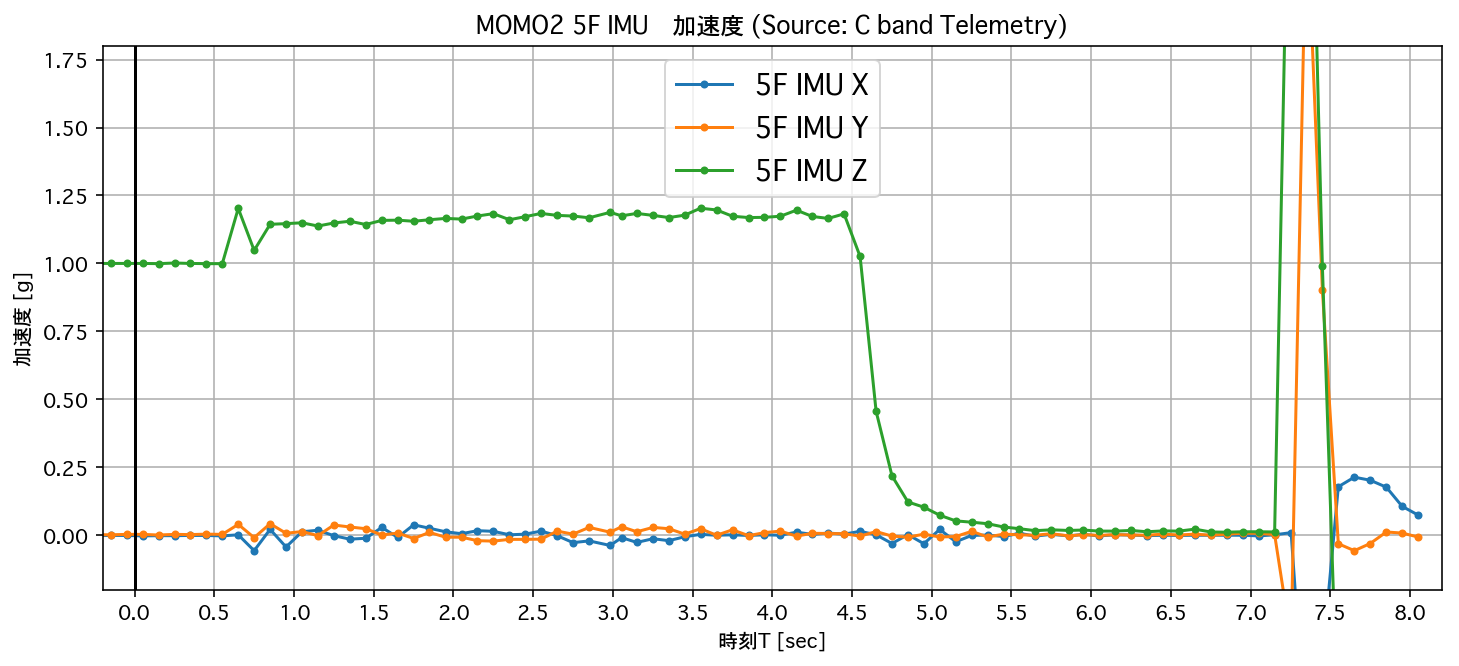

In [10]:

alpha = 1.0
plt.figure()
plt.plot(df1[1].loc[df1[88].isnull() == False], df1[88].loc[df1[88].isnull() == False], ".-", alpha=alpha, color="C0", label="5F IMU X")
plt.plot(df1[1].loc[df1[89].isnull() == False], df1[89].loc[df1[89].isnull() == False], ".-", alpha=alpha, color="C1", label="5F IMU Y")
plt.plot(df1[1].loc[df1[90].isnull() == False], df1[90].loc[df1[90].isnull() == False], ".-", alpha=alpha, color="C2", label="5F IMU Z")
plt.grid()
plt.legend(fontsize=14)
plt.title("MOMO2 5F IMU　加速度 " + source_txt)
plt.xlabel("時刻T [sec]")
plt.ylabel("加速度 [g]")
plt.xticks(np.arange(-7,8.5,0.5))
plt.xlim([-0.2, 8.2])
plt.ylim([-0.2, 1.8])
plt.axvline(x=0, color="k")
plt.savefig(savename + PC_num + "sensor_acc5F1" + ".png")
